# Cartesian to Polar

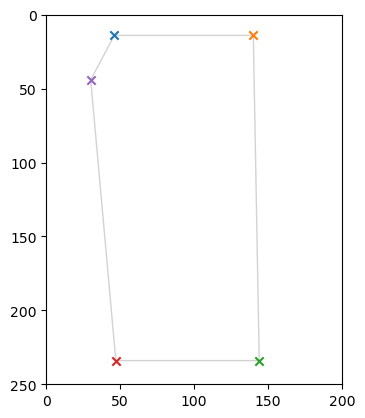

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img_size = (250, 200)
corner_points = np.array([
    [ 14,  46],
    [ 14, 140],
    [234, 144],
    [234,  47],
    [ 44,  30],
])


def draw_points(points):
    canvas = np.zeros(img_size)

    fig, ax = plt.subplots()
    ax.set_xlim(0, canvas.shape[1])
    ax.set_ylim(canvas.shape[0], 0)
    ax.set_aspect('equal')

    # Draw polygon
    polygon = plt.Polygon(
        np.flip(points),
        edgecolor='lightgray', 
        fill=None,
        linewidth=1,
    )
    ax.add_patch(polygon)

    # Draw points and angle text
    for point in points:
        ax.scatter(point[1], point[0], marker='x')

    plt.show()

    
draw_points(corner_points)

In [9]:
import doctest


def draw_points_origin(points, rowOffset, colOffset):
    canvas = np.zeros(img_size)

    fig, ax = plt.subplots()
    ax.set_xlim(-colOffset, colOffset)
    ax.set_ylim(-rowOffset, rowOffset)
    ax.set_aspect('equal')

    # Draw polygon
    polygon = plt.Polygon(
        np.flip(points),
        edgecolor='lightgray', 
        fill=None,
        linewidth=1,
    )
    ax.add_patch(polygon)

    # Draw points and angle text
    for point in points:
        ax.scatter(point[1], point[0], marker='x')

    plt.show()
    

def cartesian_to_polar(points):
    """
    >>> cartesian_to_polar(np.array([[-1,1], [-1,-1], [1,-1], [1,1]]))
    array([[  1.41421356,  45.        ],
           [  1.41421356, 135.        ],
           [  1.41421356, 225.        ],
           [  1.41421356, 315.        ]])
    """
    x, y = points[:, 1], points[:, 0]
    r = np.hypot(x, y)
    thetas = np.arctan2(y, x)
    
    def norm_theta(theta):
        if theta < 0:
            return -theta
        else:
            return -(theta - 360)
            
    v_norm_theta = np.vectorize(norm_theta)
            
    thetas_norm = v_norm_theta(np.degrees(thetas))
    
    polar_points = np.column_stack((r, thetas_norm))
    
    return polar_points

cartesian_to_polar(corner_points)

array([[ 48.08326112, 343.07248694],
       [140.6982587 , 354.28940686],
       [274.7580754 , 301.60750225],
       [238.67341704, 281.35701199],
       [ 53.25410782, 304.28687698]])

In [19]:
def get_sorted_corners(img_size, corners):
    """
    Corners sorted from upper left corner (smallest row, column) clockwise
    
    >>> get_sorted_corners((0, 0), np.array([[-1,-1], [-1,1], [1,-1], [1,1]]))
    array([[-1, -1],
           [-1,  1],
           [ 1,  1],
           [ 1, -1]])
    
    >>> get_sorted_corners((250, 200), np.array([
    ...     [ 14,  46],
    ...     [234, 144],
    ...     [ 14, 140],
    ...     [234,  47],
    ...     [ 44,  30],
    ... ]))
    array([[ 14,  46],
           [ 14, 140],
           [234, 144],
           [234,  47],
           [ 44,  30]])
    """
    # Shift coordinate sytem
    rowOffset = (img_size[0] / 2)
    colOffset = (img_size[1] / 2)
    
    moved_corner_points = corners - np.array([rowOffset, colOffset])
    
    polar_points = cartesian_to_polar(moved_corner_points)
    
    indices = np.argsort(polar_points[:, 1])
    corners_sorted = corners[indices][::-1]
    
    left_uppermost_index = np.argmin(np.sum(corners_sorted, axis=1))
    shifted_corner_points = np.roll(corners_sorted, -left_uppermost_index, axis=0)
    
    return shifted_corner_points


"""
>>> get_sorted_corners(img_size, np.random.permutation(corner_points))
array([[ 14,  46],
       [ 14, 140],
       [234, 144],
       [234,  47],
       [ 44,  30]])
       
>>> get_sorted_corners(img_size, np.random.permutation(corner_points))
array([[ 14,  46],
       [ 14, 140],
       [234, 144],
       [234,  47],
       [ 44,  30]])
       
>>> get_sorted_corners(img_size, np.random.permutation(corner_points))
array([[ 14,  46],
       [ 14, 140],
       [234, 144],
       [234,  47],
       [ 44,  30]])
"""

doctest.testmod()

TestResults(failed=0, attempted=6)